# Curve Fitting (Mr. P Solver)

Video Link: https://youtu.be/peBOquJ3fDo

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa0lKYWJKTGs5amFORmhraS0tV1NCcjBlWDF1d3xBQ3Jtc0tudkR1ZjRwZ2VzeFNhZDFJNEJyaHV3Q196aFdvcE05N0FsakRGMmpqN05GQjVNWU42dlF6T3hRWW9nRGRLNWR6Sjl2emZMX3FTaE1DcVZ2M2ZtNVU3dTlpV3hHWDJJR2hTVXd3TW9ISlcxOUlwVnNzYw&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fcurvefit1.ipynb&v=peBOquJ3fDo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.optimize import curve_fit

Given some $x_{data}=[...]$ and $y_{data}=[...]$ and a model function $f$ that dpends on unknown parameter(s) $\beta$. The goal is to find optimal set of parameters $\beta$ such that the function $y=f(x,\beta)$ best resembles the data.

1. One way of doing this is to minimize $\sum_i (f(x_i,\beta) - y_i)^2$ by adjusting the parameters in $\beta$.  Here $x_i$ and $y_i$ are the $i^{th}$ data point. This is called **Least Square Method**.

2. If the $y_i$ data points have corresponding errors on them, then minimizing $ \sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2 $ gives the **maximum likelihood** estimate for $\beta$.

Consider the model function $f(x,\beta) = f(x,a,b,c) = a(x-b)^2 + c$ for a given data (where $\beta=(a,b,c)$ are the optimal parameters). We fit the data in the following steps;
1. Define the model function.
2. Use **`curve_fit`** function of `scipy`. It requires initial guesses of $\beta$.

In [2]:
x_data = np.array([25.5,31.5,42.5,46,48.5,51.5,55.5,58.5,63])
y_data = np.array([0.995,1.06,1.5,1.545,1.66,1.833,2,2.108,2.37])

In [3]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

In [4]:
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3,2,-16])
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

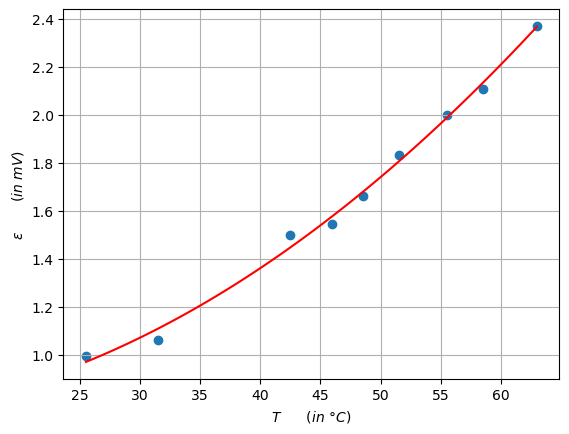

In [5]:
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.xlabel('$T$ \t $(in$ $\degree C)$')
plt.ylabel('$\epsilon$ \t $(in$ $mV)$')
plt.grid()
plt.show()

`curve_fit` gives *optimal parameters* `popt` and the corresponding *covariances* `pcov`.